In [21]:
from keras.datasets import fashion_mnist
from tensorflow import keras
from keras import layers
from keras import models
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical
(X,y),(X_test,y_test)=fashion_mnist.load_data()

In [29]:
y=to_categorical(y)
y_test=to_categorical(y_test)
X=X.reshape((60000,28*28))
X=X/255
X_test=X_test.reshape((10000,28*28))
X_test=X_test/255
t=models.Sequential()

In [30]:
X_val=X[:10000]
px_val=X[10000:]
y_val=y[:10000]
py_val=y[10000:]

In [33]:

t.add(layers.Dense(512, activation='relu'))
t.add(layers.Dropout(0.5))
t.add(layers.Dense(512,activation='relu'))
t.add(layers.Dropout(0.5))
t.add(layers.Dense(10,activation='softmax'))
t.compile(optimizer='nadam',loss='categorical_crossentropy',metrics=['acc'])

In [36]:
val=t.fit(px_val,py_val,epochs=10,batch_size=128,validation_data=(X_val,y_val))

Epoch 1/10
391/391 [==============================] - 9s 22ms/step - loss: 0.3308 - acc: 0.8776 - val_loss: 0.3135 - val_acc: 0.8869
Epoch 2/10
391/391 [==============================] - 10s 26ms/step - loss: 0.3179 - acc: 0.8820 - val_loss: 0.2995 - val_acc: 0.8903
Epoch 3/10
391/391 [==============================] - 11s 29ms/step - loss: 0.3165 - acc: 0.8826 - val_loss: 0.3042 - val_acc: 0.8841
Epoch 4/10
391/391 [==============================] - 11s 28ms/step - loss: 0.3135 - acc: 0.8835 - val_loss: 0.2991 - val_acc: 0.8926
Epoch 5/10
391/391 [==============================] - 11s 29ms/step - loss: 0.3083 - acc: 0.8850 - val_loss: 0.3018 - val_acc: 0.8903
Epoch 6/10
391/391 [==============================] - 11s 28ms/step - loss: 0.3074 - acc: 0.8851 - val_loss: 0.2994 - val_acc: 0.8917
Epoch 7/10
391/391 [==============================] - 11s 29ms/step - loss: 0.3017 - acc: 0.8866 - val_loss: 0.2965 - val_acc: 0.8938
Epoch 8/10
391/391 [==============================] - 11s 28ms/

In [37]:
val_dict=val.history
loss=val_dict['loss']
val_loss=val_dict['val_loss']

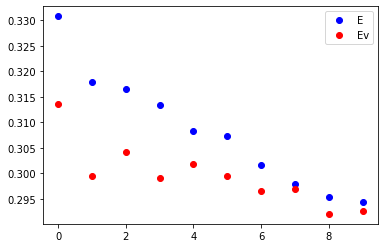

In [39]:
x=np.arange(0,len(loss))
plt.plot(x,loss,'bo',label='E')
plt.plot(x,val_loss,'ro',label='Ev')
plt.legend()

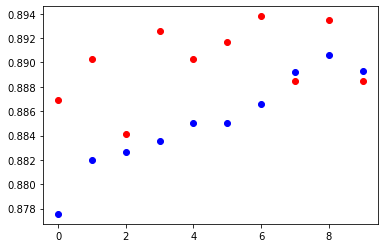

In [41]:
a=val_dict['acc']
val_a=val_dict['val_acc']
plt.plot(x,a,'bo',label='a')
plt.plot(x,val_a,'ro',label='b')